# Fare Play: An Unraveling of the Mystery of Flight Prices

by: Laundry Houston, Mark Dunlea Tate, Anthony Amadasun
 

---

### Introduction

In this section, we will employ the linear regression algorithm to gain deeper insights into our travel data. Our flight begins with an exploration of feature engineering, where we enhance the dataset to better suit our modeling needs. Following that, we delve into the intricacies of the linear regression algorithm, shedding light on its application and significance in our context.

The subsequent steps involve the training of different model on the prepared data, allowing us to uncover patterns and relationships within the features. Moreover, the best model towards predicting the most cost-effective flight options from a specific airport. Through model evaluation, we will assess the performance metrics, providing a comprehensive overview of how well our model captures the nuances of the dataset.

This section culminates in a detailed summary of our findings and the unveiling of key insights derived from the modeling process. Additionally, we will touch upon the potential for future enhancements, considering the exploration of advanced techniques such as time series models, specifically Recurrent Neural Networks (RNNs).

**Imports/Load datasets**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression, RidgeCV, LassoCV, Lasso, Ridge 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier
from xgboost import XGBRegressor

import pickle

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
df = pd.read_csv('../data/clean_dataset.csv')
df.head()

,airline,flight,origin,departure_time,stops,arrival_time,class,duration,price,duration_range,departure_time_encoded,duration_range_encoded,destination_Bangalore,destination_Chennai,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_Mumbai
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,0,130,71.44,Short,2,0,0,0,0,0,0,1
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,0,140,71.44,Short,1,0,0,0,0,0,0,1
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,0,130,71.47,Short,1,0,0,0,0,0,0,1
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,0,135,71.46,Short,4,0,0,0,0,0,0,1
4,Vistara,UK-963,Delhi,Morning,0,Morning,0,140,71.46,Short,4,0,0,0,0,0,0,1


---

### 2.1 Feature Engineering

In [3]:
df.shape

(300153, 18)

In [4]:
df.dtypes

airline                    object
flight                     object
origin                     object
departure_time             object
stops                       int64
arrival_time               object
class                       int64
duration                    int64
price                     float64
duration_range             object
departure_time_encoded      int64
duration_range_encoded      int64
destination_Bangalore       int64
destination_Chennai         int64
destination_Delhi           int64
destination_Hyderabad       int64
destination_Kolkata         int64
destination_Mumbai          int64
dtype: object

In [5]:
#additional one hot encoding
ohe_columns = ['airline', 'origin', 'arrival_time', 'departure_time', 'duration_range']
ohe_df = pd.get_dummies(df, columns=ohe_columns, prefix=ohe_columns, dtype=int, drop_first=True)

In [6]:
ohe_df.shape

(300153, 36)

In [7]:
ohe_df.columns

Index(['flight', 'stops', 'class', 'duration', 'price',
       'departure_time_encoded', 'duration_range_encoded',
       'destination_Bangalore', 'destination_Chennai', 'destination_Delhi',
       'destination_Hyderabad', 'destination_Kolkata', 'destination_Mumbai',
       'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'origin_Chennai', 'origin_Delhi',
       'origin_Hyderabad', 'origin_Kolkata', 'origin_Mumbai',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'duration_range_Medium', 'duration_range_Short',
       'duration_range_Very Long'],
      dtype='object')

---

### 2.2 Linear Regression Algorithm

In [8]:
X = ohe_df.drop(columns=['flight', 'price'])#'departure_time', 'duration_range'
y = ohe_df['price']

In [9]:
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, 
                                                    random_state=42)

In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
print(f"Training Score: {lr.score(X_train, y_train):.4f}")
print(f"Testing Score: {lr.score(X_test, y_test):.4f}")

y_poly_pred = lr.predict(X_test)

print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, y_poly_pred))}")

Training Score: 0.9428
Testing Score: 0.9420
RMSE Score: 65.63709916908026


In [13]:
with open('../model/linear_regression_model.pkl', 'wb') as f:
    pickle.dump(lr, f)

**Interpretation:**

The provided results suggest that the model performs well on both the training and testing sets, indicating that the model explains a significant portion of the variability in flight prices based on the selected features. The Training Score of 0.9428 shows that the model fits the training data welll and the Testing Score of 0.9420 shows that the model generalizes well to new, unseen data. The lower RMSE score of 65.63 indicates that the model predictions are close to the actual prices and suggest that the selected features, preprocessing, and cleaning methods contribute to accurate predictions of flight prices.





---

### 2.3 Model Training

**Random Forest**

In [14]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [15]:
print(f"Training Score: {rf.score(X_train, y_train):.4f}")
print(f"Testing Score: {rf.score(X_test, y_test):.4f}")

y_pred = rf.predict(X_test)

print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Training Score: 0.9793
Testing Score: 0.9754
RMSE Score: 42.754946001290214


In [16]:
# param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [None, 10],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1), param_grid, cv=5)
# grid_search_rf.fit(X_train, y_train)

# print("Best Parameters:", grid_search_rf.best_params_)

# best_rf = grid_search_rf.best_estimator_
# print(f"Training Score: {best_rf.score(X_train, y_train):.4f}")
# print(f"Testing Score: {best_rf.score(X_test, y_test):.4f}")

# y_pred_best_rf = best_rf.predict(X_test)
# print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, y_pred_best_rf))}")

In [17]:
# with open('../model/random_forest_model.pkl', 'wb') as f:
#     pickle.dump(rf, f)

**Interpretation**

The provided results suggest that the Random Forest model performs well in terms of both the training and testing sets, indicating that the model explains a significant portion of the variability in flight prices based on the selected features. The Training Score of 0.9793 shows that the model fits the training data welll and the Testing Score of 0.9754 shows that the model generalizes well to new, unseen data. The lower RMSE score of 42.75 indicates that the model predictions are close to the actual prices and suggest that the selected features, preprocessing, and cleaning methods contribute to accurate predictions of flight prices.

**Decision Tree**

In [18]:
dt = DecisionTreeRegressor(max_depth=3, min_samples_split=10,
                           min_samples_leaf=5)
dt.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, min_samples_split=10)

In [19]:
print(f"Training Score: {dt.score(X_train, y_train):.4f}")
print(f"Testing Score: {dt.score(X_test, y_test):.4f}")

y_pred = dt.predict(X_test)

print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Training Score: 0.9291
Testing Score: 0.9283
RMSE Score: 72.9402840766438


In [20]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search_dt = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search_dt.fit(X_train, y_train)


print("Best Parameters:", grid_search_dt.best_params_)

best_dt = grid_search_dt.best_estimator_
print(f"Training Score: {best_dt.score(X_train, y_train):.4f}")
print(f"Testing Score: {best_dt.score(X_test, y_test):.4f}")

y_pred_best = best_dt.predict(X_test)
print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, y_pred_best))}")

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2}
Training Score: 0.9450
Testing Score: 0.9439
RMSE Score: 64.53416228179877


In [21]:
with open('../model/decision_tree_model.pkl', 'wb') as f:
    pickle.dump(grid_search_dt, f)
    
'''
# Load the pickled model
with open('../model/decision_tree_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Make predictions on new data (replace X_new with your new data)
predictions = loaded_model.predict(X_new)

#Then evaluate
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE Score on New Data: {rmse}")
'''

'\n# Load the pickled model\nwith open(\'../model/decision_tree_model.pkl\', \'rb\') as f:\n    loaded_model = pickle.load(f)\n\n# Make predictions on new data (replace X_new with your new data)\npredictions = loaded_model.predict(X_new)\n\n#Then evaluate\nrmse = np.sqrt(mean_squared_error(y_test, predictions))\nprint(f"RMSE Score on New Data: {rmse}")\n'

**Interpretation**

The provided results suggest that the Decision Tree model performs well in terms of both the training and testing sets, indicating that the model explains a significant portion of the variability in flight prices based on the selected features. The Training Score of 0.9291 shows that the model fits the training data welll and the Testing Score of 0.9283 shows that the model generalizes well to new, unseen data. The lower RMSE score of 72.94 indicates that the model predictions are close to the actual prices and suggest that the selected features, preprocessing, and cleaning methods contribute to accurate predictions of flight prices.

**Gradient Boosting:**

In [22]:
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

xgb = XGBRegressor(random_state=42)

grid_search_xgb = GridSearchCV(xgb, param_grid, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_xgb.fit(X_train, y_train)

print("Best Parameters:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_

print(f"Training Score: {best_xgb.score(X_train, y_train):.4f}")
print(f"Testing Score: {best_xgb.score(X_test, y_test):.4f}")

y_pred_best_xgb = best_xgb.predict(X_test)
print(f"RMSE Score: {np.sqrt(mean_squared_error(y_test, y_pred_best_xgb))}")




Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
Training Score: 0.9593
Testing Score: 0.9580
RMSE Score: 55.81656739708218


In [ ]:
# with open('../model/gradient_boosting_model.pkl', 'wb') as f:
#     pickle.dump(grid_search_xgb, f)

**Interpretation**

The provided results suggest that the Gradient Boost model performs well in terms of both the training and testing sets, indicating that the model explains a significant portion of the variability in flight prices based on the selected features. The Training Score of 0.9593 shows that the model fits the training data welll and the Testing Score of 0.958 shows that the model generalizes well to new, unseen data. The lower RMSE score of 55.81 indicates that the model predictions are close to the actual prices and suggest that the selected features, preprocessing, and cleaning methods contribute to accurate predictions of flight prices.

---

### 2.4 Model Evaluation

**What features are crucial for predicting optimal timeframes for lower-priced flights?**

In [37]:
#feature analysis
feature_importance = rf.feature_importances_

In [38]:
# Get feature names after polynomial transformation
poly_feature_names = poly.get_feature_names_out(X.columns)

In [39]:
#dictionary to map feature names to their importance scores
feature_importance_dict = dict(zip(poly_feature_names, feature_importance))

In [40]:
#Sort the dictionary based on importance scores
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

In [41]:
# Print feature importance
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

class duration: 0.928667804988699
duration airline_Vistara: 0.015028481980078782
stops duration: 0.0031386596120580104
duration: 0.002510501627660943
duration^2: 0.0023221643764603367
duration departure_time_encoded: 0.0022602878781750064
duration destination_Kolkata: 0.002011759611671013
duration origin_Kolkata: 0.0017634867528648868
duration destination_Delhi: 0.0015401523937168572
departure_time_encoded destination_Mumbai: 0.0013925449514766823
destination_Bangalore origin_Mumbai: 0.0013793806924562487
duration destination_Hyderabad: 0.0012095011220107732
duration origin_Hyderabad: 0.0011677883040410088
duration arrival_time_Morning: 0.001090040370874152
duration departure_time_Morning: 0.0010460059059912421
duration arrival_time_Evening: 0.0010335187922108722
duration origin_Mumbai: 0.0010314884783152063
duration airline_Air_India: 0.0009847674754142211
duration destination_Bangalore: 0.0009371680148406256
duration arrival_time_Night: 0.0009256553220788122
duration duration_range_M

**Interpretation:**

To answer the project question, what features are crucial for predicting optimal timeframes for lower-priced flights, we utilized the most optimal model and analyzed the feature importance. The output of the code provides the importance scores for each feature in predicting flight prices using a RandomForestRegressor with polynomial features. The importance scores are normalized values that indicate the contribution of each feature to the model's predictive performance.

- The most crucial feature for predicting flight prices is duration, with a high importance score of 0.9287. This suggests that the duration of the flight significantly influences the pricing.
- Coming second is the the interaction between duration and flights operated by Vistara. After that comes the interaction between the number of stops and duration, which has a smaller but still notable importance.

In summary, the crucial feature for predicting optimal timeframes for lower-priced flights is duration. This implies that the duration of the flight is a significant factor influencing the pricing of flights. Travelers looking for lower-priced flights may find it beneficial to consider the duration of the flights, suggesting that shorter durations might be associated with lower prices. Additionally, interactions with airline types and other features also contribute to the pricing model.

**How generalizable are the insights derived from this specific dataset to other airports or travel scenarios?**

Optimal model (Random Forest):
- Training Score: 0.9793
- Testing Score: 0.9754
- RMSE Score: 42.754946001290214
The training and testing scores for the Random Forest model indicate that the model performs well on the specific dataset used for training and testing. However, to get a better sense to determine the generalizability of the insights to other airports or travel scenarios, cross-validation will also be utilized. 

In [42]:
kf = KFold(n_splits=5, shuffle=True, random_state=42) 

# Perform cross-validation
cross_val_results = cross_val_score(rf, X_poly, y, cv=kf)
print(f"Cross-Validation Results: {cross_val_results}")
print(f"Mean CV Score: {cross_val_results.mean()}")


KeyboardInterrupt: 

In [ ]:
# with open('../model/cross_val.pkl', 'wb') as f:
#     pickle.dump(cross_val_results, f)

**Interpretation:**

The R-squared scores are high and consistent across folds, indicating that the model generalizes well to different subsets of the data. Moreover, the mean cross-validation score is also high e.g., close to 1, furtger indicating that the model performs well on average across different data subsets. In summary, the cross-validation results implies that the insights derived from the dataset are likely to be generalizable to other airports or travel scenarios, as the model shows consistent performance across multiple subsets.


**Visualize Location Data**

In [43]:
import folium
import plotly.express as px

In [44]:
cities = {'Delhi': (28.6139, 77.2090), 'Mumbai': (19.0760, 72.8777), 'Bangalore': (12.9716, 77.5946),
          'Kolkata': (22.5726, 88.3639), 'Chennai': (13.0827, 80.2707), 'Hyderabad': (17.3850, 78.4867)}

In [45]:
df_pred = pd.DataFrame(list(cities.keys()), columns=['City'])

df_pred['Longitude'] = df_pred['City'].map(lambda x: cities[x][1])
df_pred['Latitude'] = df_pred['City'].map(lambda x: cities[x][0])
df_pred['Predicted_Price'] = y_pred[:len(df_pred)]

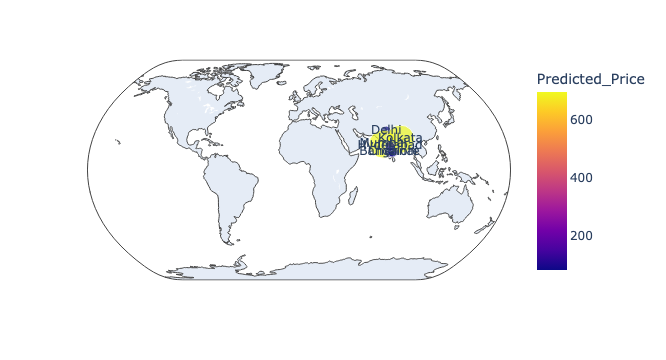

In [46]:
fig = px.scatter_geo(df_pred, lat='Latitude', lon='Longitude', color='Predicted_Price',
                     text='City', size='Predicted_Price', projection='natural earth')
fig.show()

In [47]:
m = folium.Map(location=[20, 77], zoom_start=5)  
# logic attained from https://www.kaggle.com/code/fulrose/copy-fix-house-price-prediction-1-2

# Add markers for each city
for index, row in df_pred.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=f"{row['City']}: {row['Predicted_Price']}",
                  icon=folium.Icon(color='blue')).add_to(m)

# Add lines connecting cities based on predicted prices
for i in range(len(df_pred)):
    for j in range(i + 1, len(df_pred)):
        coords_i = [df_pred.at[i, 'Latitude'], df_pred.at[i, 'Longitude']]
        coords_j = [df_pred.at[j, 'Latitude'], df_pred.at[j, 'Longitude']]

        # Calculate line color based on predicted prices
        color = 'red' if df_pred.at[i, 'Predicted_Price'] > df_pred.at[j, 'Predicted_Price'] else 'green'

        # Create a PolyLine between the two cities
        folium.PolyLine(locations=[coords_i, coords_j], color=color, weight=2.5, opacity=1).add_to(m)

In [48]:
m

In [ ]:
residuals = y_test - y_pred

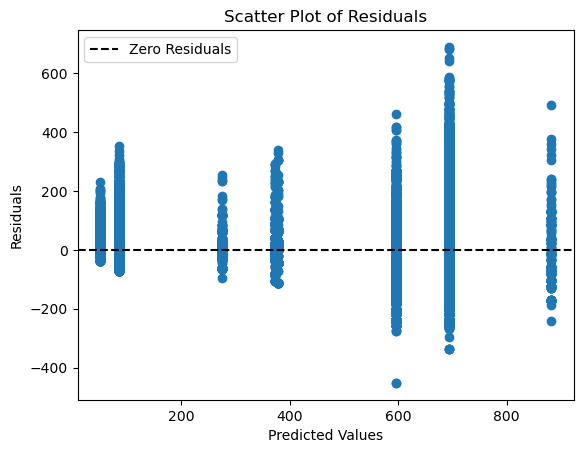

In [53]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--', label='Zero Residuals')
plt.legend()
plt.title('Scatter Plot of Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.savefig('../images/scatter_plot_residuals.png', bbox_inches='tight')
plt.show()


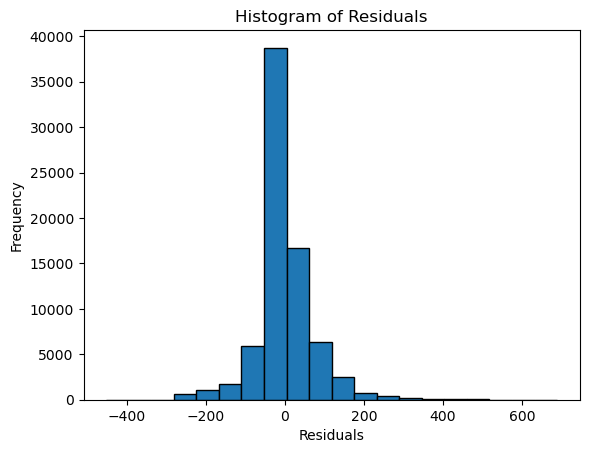

In [54]:
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.savefig('../images/scatter_plot_histogram.png', bbox_inches='tight')
plt.show()


**Interpretation:**

The distribution is centered around zero, suggesting that, on average, the model tends to make predictions that are close to the actual values. Moreover, the histogram shows a symmetric pattern, implying that the model is unbiased and makes errors both above and below the actual values equally. There are few outliers in the model as seen in the scatterplot. In summay, since the residuals is centered around zero, and having a narrow spread indicates a well-performing model. 

---

### 2.5 Summary and Future Enhancement

**Executive Summary:**

Our analysis focused on predicting optimal timeframes for lower-priced flights using various machine learning models, with the Random Forest model emerging as the most effective.

1. Model Performance:

- Random Forest:
    - Training Score: 0.9793
    - Testing Score: 0.9754
    - RMSE Score: 42.75
- Cross-Validation Mean Score: 0.9759
- Gradient Boost (XGB)
    - Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.8}
    - Training Score: 0.9593
    - Testing Score: 0.9580
    - RMSE Score: 55.81656739708218
- Decision Tree:
    - Best Parameters: {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2}
    - Training Score: 0.9450
    - Testing Score: 0.9439
    - RMSE Score: 64.53
- Linear Regression:
    - Training Score: 0.9428
    - Testing Score: 0.9420
    - RMSE Score: 65.64

2. Key Insights:

- Crucial Feature: Duration (Importance Score: 0.9287)
- Airlines and Pricing:
    - Vistara: Highest average ticket price
    - AirAsia: Lowest average ticket price
    - Indigo, Spicejet, GO_FIRST: Competitive pricing
- Time-of-Day Influence:
    - Late-night flights are the cheapest, while early-night flights are the most expensive.
    - Evening flights have the highest average price.
- Regional Price Variations:
    - Delhi: Average price ~227.42
    - Mumbai: Average price ~257.81
    - Bangalore: Average price ~257.63
    - Kolkata: Average price ~260.96
    - Hyderabad: Average price ~241.87
    - Chennai: Average price ~263.94
- Correlation Analysis:
    - Strong correlations: Class and duration range
    - Weaker correlations: Number of stops and specific destinations
    
3. Future Recommendations:

- Enhanced Modeling: Explore advanced models like time series models, such as Recurrent Neural Networks (RNN), for better capturing temporal patterns in flight prices. Using such a model can better capture variations in prices over time, when considering factors like seasonality and trends. As a result, provide a more holistic understanding of the factors influencing flight prices.
- Data Generalization: Conduct further analysis to assess the generalizability of insights to other airports or travel scenarios, possibly through transfer learning techniques.
- Dynamic Pricing Strategy: Collaborate with airlines to understand and incorporate dynamic pricing strategies based on factors influencing flight prices.

This comprehensive analysis provides valuable insights for optimizing travel bookings, catering to both cost-sensitive and premium travelers. Future enhancements can leverage advanced models and additional features for even more accurate prediction
